Importing the packages required to study and analyse the data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pyodbc
dr=pyodbc.drivers();
dr

['SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [2]:
import pyodbc

# Replace these with your actual SQL Server credentials
server = "MANU"
database = "madhuri"

# Build the connection string
connection_string = (
    f"DRIVER={{SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
)

try:
    # Establish the connection
    cnxn = pyodbc.connect(connection_string)

    # Create a cursor from the connection
    cursor = cnxn.cursor()

    # Query to retrieve a list of databases
    query = "SELECT name FROM sys.databases"

    # Execute the query
    cursor.execute(query)

    # Fetch all the rows
    rows = cursor.fetchall()

    # Print the list of databases
    print("List of databases:")
    for row in rows:
        print(row[0])

except Exception as e:
    print(f"Error: {str(e)}")


List of databases:
master
tempdb
model
msdb
madhuri


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Execute query and store results in a DataFrames
delivery = pd.read_sql_query('SELECT * FROM JD_Delivery_Data', cnxn)
user = pd.read_sql_query('SELECT * FROM JD_User_Data', cnxn)
click = pd.read_sql_query('SELECT * FROM JD_Click_data', cnxn)
Sku = pd.read_csv('C:/Users/msgme/Downloads/JD_sku_data.csv')
order = pd.read_sql_query('SELECT * FROM JD_Order_data', cnxn)
inventory =pd.read_sql_query('SELECT * FROM JD_Inventory_Data', cnxn)

In [4]:
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Read the data files successfully

# Data Cleaning
## 1. Delivery Table

In [5]:
delivery.head()

,package_ID,order_ID,type,ship_out_time,arr_station_time,arr_time
0,0000132b39,0000132b39,1,2018-03-13 20:00:00,2018-03-14 08:00:00,2018-03-14 15:00:00
1,000064fa67,000064fa67,1,2018-03-02 11:00:00,2018-03-02 16:00:00,2018-03-02 19:00:00
2,0000bde331,0000bde331,1,2018-03-17 16:00:00,2018-03-18 07:00:00,2018-03-18 12:00:00
3,00016f6069,00016f6069,1,2018-03-10 20:00:00,2018-03-11 13:00:00,2018-03-11 15:00:00
4,00019d59fd,00019d59fd,1,2018-03-30 23:00:00,2018-03-31 06:00:00,2018-03-31 09:00:00


In [6]:
delivery.shape

(293229, 6)

In [7]:
delivery.columns

Index(['package_ID', 'order_ID', 'type', 'ship_out_time', 'arr_station_time',
       'arr_time'],
      dtype='object')

Delivery dataset has 293229 records with 6 columns.
It captures delivery information from shipment of order to delivery to customer.
The column names of the dataset are displayed

In [8]:
delivery.isnull().sum()

package_ID          0
order_ID            0
type                0
ship_out_time       0
arr_station_time    0
arr_time            0
dtype: int64

There are no null values in the dataset as the sum of null values is zero.

In [9]:
delivery['type'].unique()

array([1, 0], dtype=int64)

In [10]:
delivery['type'].value_counts()

1    244333
0     48896
Name: type, dtype: int64

Checking the columns individually if they contain any null values other than the unique column values. Ignored the columns with ID details and time details as their unique value count is extreme. The type column have only two unique values which describes if the product is sold by JD.com (type 1) or Third party vendors (type 0).

## 2. User Table

In [11]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_ID         457298 non-null  object
 1   user_level      457298 non-null  int64 
 2   first_order     457298 non-null  object
 3   plus            457298 non-null  int64 
 4   gender          457298 non-null  object
 5   age             457298 non-null  object
 6   marital_status  457298 non-null  object
 7   education       457298 non-null  int64 
 8   city_level      457298 non-null  int64 
 9   purchase_power  457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


In [12]:
user.head()

,user_ID,user_level,first_order,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


In [13]:
user.shape

(457298, 10)

This table has 4,57,298 unique users with their demographic data in ten columns

In [14]:
user.isnull().sum()

user_ID           0
user_level        0
first_order       0
plus              0
gender            0
age               0
marital_status    0
education         0
city_level        0
purchase_power    0
dtype: int64

No Null values found in the users table of JD.com

In [15]:
user['user_level'].value_counts()

 2     141859
 1     129429
 3      96802
 4      85728
-1       2303
 10      1016
 0        161
Name: user_level, dtype: int64

Checking each column unique values to identify if any unknown parameters are present. There are no null values in user level.

In [16]:
user['user_level'] = user['user_level'].replace({10: 6})
user['user_level'] = user['user_level'].replace({4: 5})
user['user_level'] = user['user_level'].replace({3: 4})
user['user_level'] = user['user_level'].replace({2: 3})
user['user_level'] = user['user_level'].replace({1: 2})
user['user_level'] = user['user_level'].replace({0: 1})
user['user_level'] = user['user_level'].replace({-1: 0})
user['user_level'].value_counts()

3    141859
2    129429
4     96802
5     85728
0      2303
6      1016
1       161
Name: user_level, dtype: int64

Arranged the values in categorial order from 0 to 6 as the lowest -1 represent first time buyer and number increases as purchases increase upto level 4 and value 10 represents vendors.

In [17]:
user['plus'].unique()

array([0, 1], dtype=int64)

Unique values for plus column and gender column are observed. Gender have some unknown values.

In [18]:
user['gender'].value_counts()

F    292897
M    107084
U     57317
Name: gender, dtype: int64

In [19]:
user['age'].value_counts()

26-35    183239
16-25    103306
36-45     81076
U         56457
46-55     18679
>=56      14517
<=15         24
Name: age, dtype: int64

In [20]:
user['marital_status'].value_counts()

M    183437
S    179577
U     94284
Name: marital_status, dtype: int64

To address unknown values and ensure the completeness of the dataset for analysis, the unknown values in the user features(Marital Status, Age, Gender) are imputed by random sampling technique. The probability of selecting each category was determined by its relative frequency in the dataset.

In [21]:
# -1 represents unknown values
user['education'] = user['education'].replace({-1 : 'U'})
user['city_level'] = user['city_level'].replace({-1 : 'U'})
user['purchase_power'] = user['purchase_power'].replace({-1 : 'U'})

In [22]:
# List of features with unknown values
features_with_unknown = ['marital_status', 'age', 'gender','education','city_level','purchase_power']

iterations = 0
while iterations < 10:
    for feature in features_with_unknown:
        category_prob = user[feature].value_counts(normalize=True)        
        missing_indices = user[user[feature] == 'U'].index        
        user.loc[missing_indices, feature] = np.random.choice(category_prob.index,
                                                             size=len(missing_indices),
                                                             p=category_prob.values)    
    iterations += 1

In [23]:
user['education'].value_counts()

3    287341
2     97798
4     61336
1     10823
Name: education, dtype: int64

In [24]:
user['education'] = user['education'].replace({1 : 0})
user['education'] = user['education'].replace({2 : 1})
user['education'] = user['education'].replace({3 : 2})
user['education'] = user['education'].replace({4 : 3})

In [25]:
user['education'].value_counts()

2    287341
1     97798
3     61336
0     10823
Name: education, dtype: int64

The values are assigned 0 to 3 in order. 0 represents lowest degree of education and 3 represents highest education level

In [26]:
user['city_level'] = user['city_level'].replace({5 : 0})
user['city_level'] = user['city_level'].replace({4 : 6})
user['city_level'] = user['city_level'].replace({3 : 7})
user['city_level'] = user['city_level'].replace({2 : 3})
user['city_level'] = user['city_level'].replace({1 : 4})
user['city_level'] = user['city_level'].replace({6 : 1})
user['city_level'] = user['city_level'].replace({7 : 2})

In [27]:
user['city_level'].value_counts()

3    170596
4    119187
2     85318
1     75034
0      7163
Name: city_level, dtype: int64

The values are assigned from 0 to 4 in order. 0 represents lowest level in city and 4 represents highest industrialized cities. city level 4 and 3 were temporarility parked in other value as they were overlaping with existing levels-1 and 2.

In [28]:
user['purchase_power'] = user['purchase_power'].replace({1 : 0})
user['purchase_power'] = user['purchase_power'].replace({2 : 1})
user['purchase_power'] = user['purchase_power'].replace({3 : 2})
user['purchase_power'] = user['purchase_power'].replace({4 : 3})
user['purchase_power'] = user['purchase_power'].replace({5 : 4})

In [29]:
user['purchase_power'].value_counts()

1    306809
2    125304
3     13928
0     11065
4       192
Name: purchase_power, dtype: int64

The values are assigned from 0 to 3 in order. 0 represents users having lowest purchase power and 4 represents users with highest purchase power.

## Insights from the customer segmentation analysis considering factors like gender, age, and JD plus members

<AxesSubplot:>

Text(0.5, 1.0, ' Distribution of user_level')

Text(0.5, 0, 'user_level')

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

Text(0, 0.5, 'Count')

<AxesSubplot:>

Text(0.5, 1.0, ' Distribution of plus')

Text(0.5, 0, 'plus')

[Text(0, 0, '0'), Text(1, 0, '1')]

Text(0, 0.5, 'Count')

<AxesSubplot:>

Text(0.5, 1.0, ' Distribution of gender')

Text(0.5, 0, 'gender')

[Text(0, 0, 'F'), Text(1, 0, 'M')]

Text(0, 0.5, 'Count')

<AxesSubplot:>

Text(0.5, 1.0, ' Distribution of age')

Text(0.5, 0, 'age')

[Text(0, 0, '16-25'),
 Text(1, 0, '26-35'),
 Text(2, 0, '36-45'),
 Text(3, 0, '46-55'),
 Text(4, 0, '<=15'),
 Text(5, 0, '>=56')]

Text(0, 0.5, 'Count')

<AxesSubplot:>

Text(0.5, 1.0, ' Distribution of marital_status')

Text(0.5, 0, 'marital_status')

[Text(0, 0, 'M'), Text(1, 0, 'S')]

Text(0, 0.5, 'Count')

<AxesSubplot:>

Text(0.5, 1.0, ' Distribution of education')

Text(0.5, 0, 'education')

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

Text(0, 0.5, 'Count')

<AxesSubplot:>

Text(0.5, 1.0, ' Distribution of city_level')

Text(0.5, 0, 'city_level')

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

Text(0, 0.5, 'Count')

<AxesSubplot:>

Text(0.5, 1.0, ' Distribution of purchase_power')

Text(0.5, 0, 'purchase_power')

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

Text(0, 0.5, 'Count')

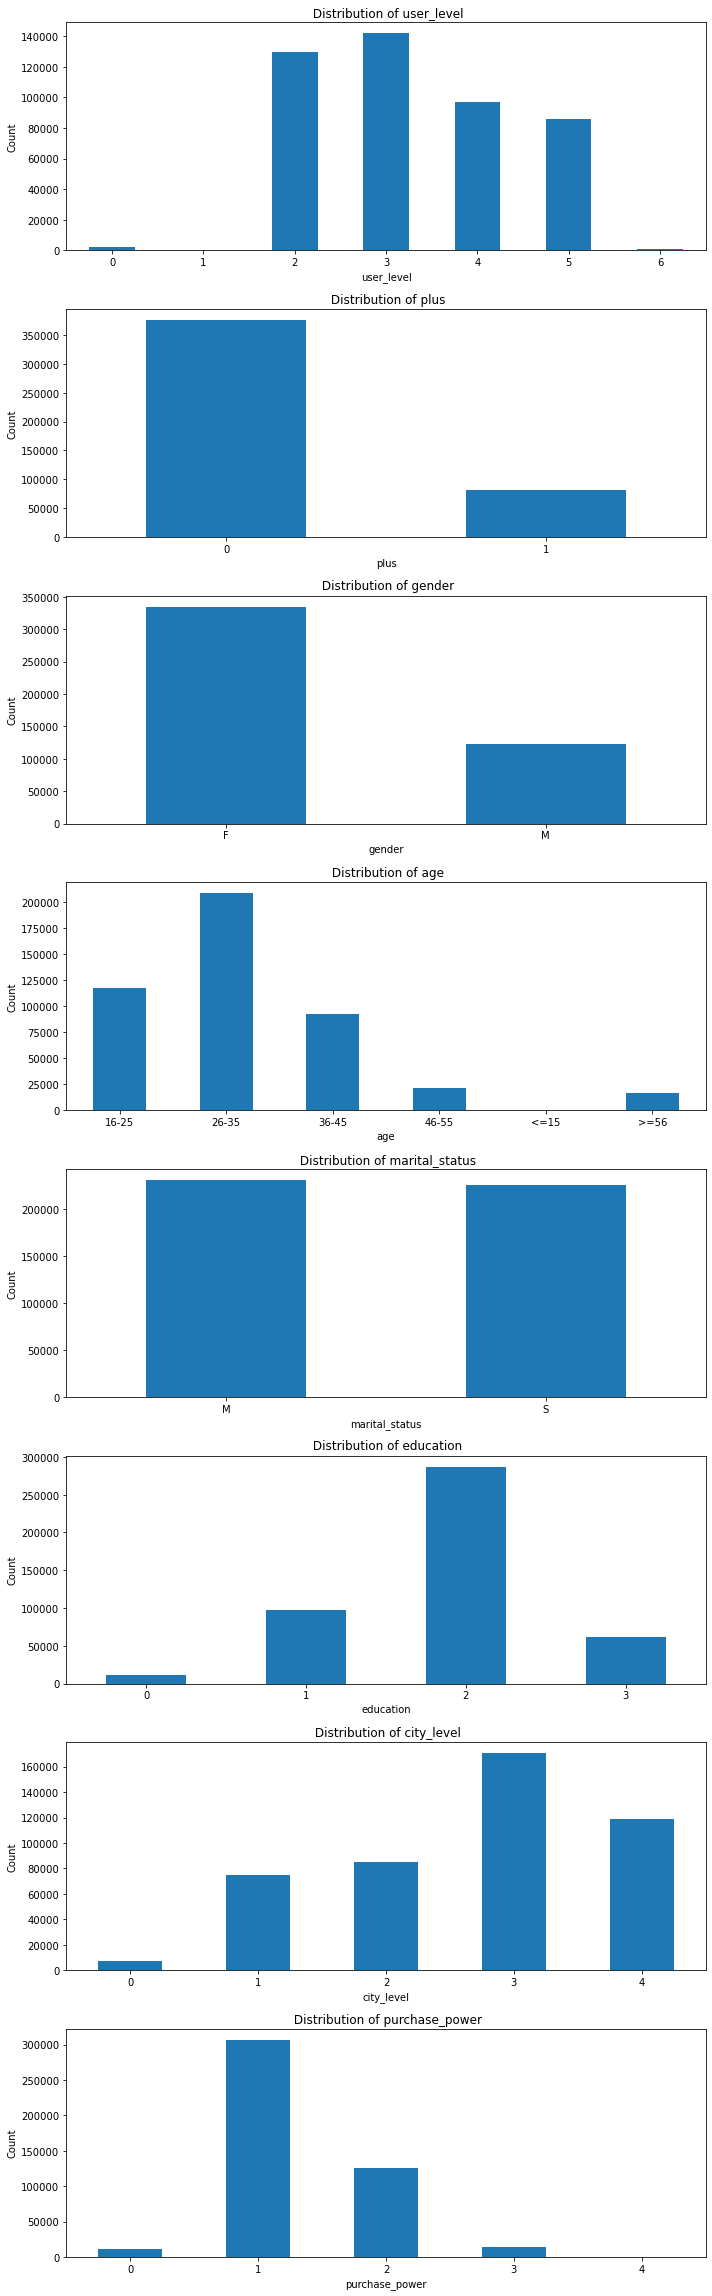

In [30]:
import matplotlib.pyplot as plt
categorical_columns = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 4 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    ax = axes[i]
    user[column].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f' Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylabel('Count')

plt.subplots_adjust(hspace=0.5)  
plt.tight_layout()
plt.show()

Plotted few graphs to study each column values. Education level-3 is the majority which means most users have Bachelor’s degree The age group of 26-35 years are the largest portion of users. Additionally, female customers outnumber males.

In [31]:
user['age'] = user['age'].replace({'>=56' : 5})
user['age'] = user['age'].replace({'46-55' : 4})
user['age'] = user['age'].replace({'36-45' : 3})
user['age'] = user['age'].replace({'26-35' : 2})
user['age'] = user['age'].replace({'16-25' : 1})
user['age'] = user['age'].replace({'<=15' : 0})

In [32]:
user['age'].value_counts()

2    208907
1    117940
3     92530
4     21272
5     16619
0        30
Name: age, dtype: int64

The string values are converted to numeric values according to their order. 0 is assigned to youngest age group and 5 to the oldest user age group

In [33]:
user['gender'] = user['gender'].replace({'F': 1})
user['gender'] = user['gender'].replace({'M': 0})

In [34]:
user['gender'].value_counts()

1    334905
0    122393
Name: gender, dtype: int64

In [35]:
user['marital_status'] = user['marital_status'].replace({'M' : 1})
user['marital_status'] = user['marital_status'].replace({'S' : 0})

In [36]:
user['marital_status'].value_counts()

1    231222
0    226076
Name: marital_status, dtype: int64

## 3. Click Table
Click table establishes the connection between users and SKUs through thier browsing history.
Each record in the click table represents the users click event.

In [37]:
click.head(5)

,sku_ID,user_ID,request_time,channel
0,c4858d9437,b1775e149d,2018-03-01 23:45:13,app
1,c4858d9437,b1775e149d,2018-03-01 23:46:19,app
2,c4858d9437,b1775e149d,2018-03-01 23:46:06,app
3,c4858d9437,ce1bfb8c5f,2018-03-01 23:47:45,app
4,c4858d9437,ce1bfb8c5f,2018-03-01 23:48:01,app


In [38]:
click.dtypes

sku_ID                  object
user_ID                 object
request_time    datetime64[ns]
channel                 object
dtype: object

There are 4 colmuns in click table.
 Sku_ID:        unique SKU identification code    
 user_ID:       unique user identification code
 request_time:  Date and time when customer clicks SKU item page
 channel:       Differnt click channel
 The columns are of object datatypes.

In [39]:
click.shape

(19727248, 4)

There are 20214515 records with 4 rows in the click table

In [40]:
click['channel'] = click['channel'].astype('string')
click.dtypes

sku_ID                  object
user_ID                 object
request_time    datetime64[ns]
channel                 string
dtype: object

Datatype of channel column is changed to string datatype.

In [41]:
click['request_time'] = pd.to_datetime(click['request_time'])
click.dtypes

sku_ID                  object
user_ID                 object
request_time    datetime64[ns]
channel                 string
dtype: object

converted request_time datatype to datetime for further processing

In [42]:
date = click['request_time'].dt.date
time = click['request_time'].dt.time
click.loc[:, 'request_date'] = date
click.loc[:, 'request_time'] = time

Added new column 'request_time' and 'request_date' for easy data analysis process

In [43]:
click.head()

,sku_ID,user_ID,request_time,channel,request_date
0,c4858d9437,b1775e149d,23:45:13,app,2018-03-01
1,c4858d9437,b1775e149d,23:46:19,app,2018-03-01
2,c4858d9437,b1775e149d,23:46:06,app,2018-03-01
3,c4858d9437,ce1bfb8c5f,23:47:45,app,2018-03-01
4,c4858d9437,ce1bfb8c5f,23:48:01,app,2018-03-01


Checked if new colmuns added in the click table

In [44]:
click.isnull().sum()

sku_ID          0
user_ID         0
request_time    0
channel         0
request_date    0
dtype: int64

Checked if any null values present in the dataset. No missing values found.

In [45]:
click.pivot_table(index=['sku_ID'], aggfunc='size')

sku_ID
000161cd1b        9
00078c2a0f        9
0009ac56b7        9
000aa92b82      654
000d4af39d      216
              ...  
fff84ed7ec      656
fffaaabb99      307
fffe1bd280    27292
fffe6eb4df      904
ffffd456aa        6
Length: 31867, dtype: int64

Above pivot table shows multiple count for SKU_id which refers to the number of times the product is viewed.

In [46]:
click.pivot_table(index=['user_ID'], aggfunc='size')

user_ID
-             2222364
00000e0594          3
000014394e          3
00001dce11          1
00002a195f          8
               ...   
ffffce5cf6          6
ffffd8f6b3          1
ffffe74cfb          1
fffff395f3          7
fffffa3a9d          8
Length: 2557837, dtype: int64

Above pivot tables shows number of times users have visited JD.com

## 4. SKU Table

In [47]:
Sku.head(5)

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date,rating
0,a234e08c57,1,c3ab4bf4d9,3,60,NaN,NaN,3
1,6449e1fd87,1,1d8b4b4c63,2,50,NaN,NaN,2
2,09b70fcd83,2,eb7d2a675a,3,70,NaN,NaN,2
3,acad9fed04,2,9b0d3a5fc6,3,70,NaN,NaN,5
4,2fa77e3b4d,2,b681299668,-,-,NaN,NaN,4


In [48]:
Sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31868 entries, 0 to 31867
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_ID           31868 non-null  object
 1   type             31868 non-null  int64 
 2   brand_ID         31868 non-null  object
 3   attribute1       31868 non-null  object
 4   attribute2       31868 non-null  object
 5   activate_date    3058 non-null   object
 6   deactivate_date  1141 non-null   object
 7   rating           31868 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.9+ MB


In [49]:
Sku.isnull().sum()

sku_ID                 0
type                   0
brand_ID               0
attribute1             0
attribute2             0
activate_date      28810
deactivate_date    30727
rating                 0
dtype: int64

In [50]:
Sku.drop(columns=['activate_date'], inplace=True)
Sku.drop(columns=['deactivate_date'], inplace=True)

Dropping two columns 'activate_date' and 'deactivate_date' as they have more null values and not useful for the project.

In [51]:
Sku['attribute1'].replace('-', np.nan, inplace=True)
Sku['attribute1']=Sku['attribute1'].astype('float')
Sku['attribute2'].replace('-', np.nan, inplace=True)
Sku['attribute2']=Sku['attribute2'].astype('float')

Converting attribute1 and attribute2 from object to float For each attribute, a higher value indicates better performance of a certain functionality of products (eg: longer battery life and higher screen resolution).

<AxesSubplot:title={'center':'Distribution of Attribute2 across all SKU'}, xlabel='attribute2'>

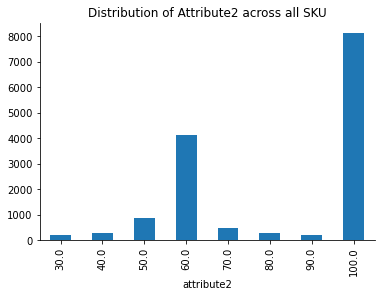

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns
Sku.groupby('attribute2').size().plot(kind='bar', title='Distribution of Attribute2 across all SKU')
plt.gca().spines[['top', 'right',]].set_visible(False)

<AxesSubplot:title={'center':'Distribution of Attribute1 across all SKU'}, xlabel='attribute1'>

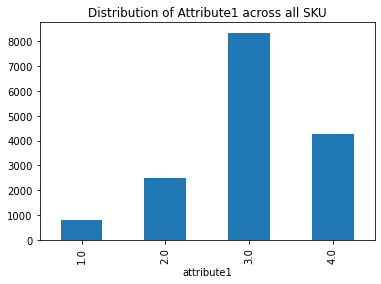

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns
Sku.groupby('attribute1').size().plot(kind='bar',title='Distribution of Attribute1 across all SKU')

## 5. Order

In [54]:
order.head(5)

,index,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,brand_ID
0,1,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25,1,2,None,89.0,79.0,0.0,10.0,0.0,0.0,0.0,4.0,28.0,198cec62a1
1,2,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0.0,28.0,28.0,9b0d3a5fc6
2,3,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0.0,28.0,28.0,-
3,4,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0.0,4.0,28.0,-
4,5,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0.0,3.0,16.0,-


In [55]:
order.shape

(541098, 19)

In [56]:
order.isnull().sum()

index                              0
order_ID                           0
user_ID                            0
sku_ID                             0
order_date                         0
order_time                         0
quantity                           0
type                               0
promise                       203062
original_unit_price                0
final_unit_price                   0
direct_discount_per_unit           0
quantity_discount_per_unit         0
bundle_discount_per_unit           0
coupon_discount_per_unit           0
gift_item                          0
dc_ori                             0
dc_des                             0
brand_ID                           0
dtype: int64

The table have 17 columns and 549989 records. Checked for null values and there are no null values in order table of JD.com

In [57]:
order.dtypes

index                                  int64
order_ID                              object
user_ID                               object
sku_ID                                object
order_date                            object
order_time                    datetime64[ns]
quantity                               int64
type                                   int64
promise                               object
original_unit_price                  float64
final_unit_price                     float64
direct_discount_per_unit             float64
quantity_discount_per_unit           float64
bundle_discount_per_unit             float64
coupon_discount_per_unit             float64
gift_item                            float64
dc_ori                               float64
dc_des                               float64
brand_ID                              object
dtype: object

Checked the datatypes of the columns and if values are captured correctly

In [58]:
order.describe()

,index,quantity,type,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
count,541098.000000,541098.000000,541098.000000,541098.000000,541098.000000,541098.000000,541098.000000,541098.000000,541098.000000,541098.000000,541098.000000,541098.000000
mean,275649.791114,1.214360,1.494472,104.152752,72.539306,20.077272,7.946541,0.622080,2.967552,0.161795,12.134981,21.697155
std,158640.888507,1.855342,0.499970,94.973225,75.989611,33.709421,18.102869,6.434889,11.675290,0.368263,14.280076,16.977118
min,1.000000,1.000000,1.000000,0.000000,-32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,138375.250000,1.000000,1.000000,59.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,275757.500000,1.000000,1.000000,79.000000,59.000000,4.000000,0.000000,0.000000,0.000000,0.000000,7.000000,20.000000
75%,413158.750000,1.000000,2.000000,139.000000,96.000000,21.000000,0.000000,0.000000,0.000000,0.000000,10.000000,34.000000
max,549989.000000,400.000000,2.000000,12158.000000,12158.000000,720.000000,225.000000,201.000000,210.000000,1.000000,67.000000,67.000000


The statistical analysis for order table shows some outliners present in the data which needs to be worked on.

# Descriptive Analysis
## Which is the most used platform for shopping?
Using group by function on channel and then on number of users for each channel, we will get channel with most used platform

In [59]:
diff_channel = click.groupby('channel')

In [60]:
diff_channel.first()

,sku_ID,user_ID,request_time,request_date
channel,,,,
app,c4858d9437,b1775e149d,23:45:13,2018-03-01
mobile,e237f26793,-,14:22:20,2018-03-03
others,c5c5bed056,-,06:46:42,2018-03-01
pc,730b175937,-,21:09:17,2018-03-02
wechat,3a64d9667a,cec8139a5c,23:36:17,2018-03-02


In [61]:
channel_count = click.groupby('channel').size().reset_index(name='no. of users for each channel')
#sorted_df = df.sort_values(by=['Column_name'], ascending=True)
sorted_channel_count = channel_count.sort_values(by = ['no. of users for each channel'], ascending= False)

In [62]:
sorted_channel_count.head()

,channel,no. of users for each channel
0,app,14702575
4,wechat,2591321
3,pc,1021665
1,mobile,958385
2,others,453302


Output shows JD.com app has the highest number of users followed by wechat app and personal computers

In [63]:
merged_data1 = pd.merge(order,delivery, on="order_ID", how = "inner")
merged_data1.shape

(322827, 24)

In [64]:
order.shape

(541098, 19)

In [65]:
delivery.shape

(293229, 6)

In [66]:
merged_data1.head()

,index,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,...,coupon_discount_per_unit,gift_item,dc_ori,dc_des,brand_ID,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,2,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,...,0.0,0.0,28.0,28.0,9b0d3a5fc6,7444318d01,1,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,3,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,...,0.0,0.0,28.0,28.0,-,f973b01694,1,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,4,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,...,0.0,0.0,4.0,28.0,-,8c1cec8d4b,1,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,5,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,...,6.0,0.0,3.0,16.0,-,d43a33c38a,1,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,6,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,...,0.0,0.0,3.0,16.0,9b0d3a5fc6,e0f5386d87,1,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00


Merged the order and delivery tables with inner join. i.e orders which were delivered are taken for analysis.

In [67]:
merged_data1.drop(columns=['type_y'], inplace=True)
merged_data1.head()

,index,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,brand_ID,package_ID,ship_out_time,arr_station_time,arr_time
0,2,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,...,0.0,0.0,0.0,28.0,28.0,9b0d3a5fc6,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,3,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,...,0.0,0.0,0.0,28.0,28.0,-,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,4,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,...,0.0,0.0,0.0,4.0,28.0,-,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,5,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,...,0.0,6.0,0.0,3.0,16.0,-,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,6,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,...,0.0,0.0,0.0,3.0,16.0,9b0d3a5fc6,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00


Dropped the type_y column as it was same as type_x column.

In [68]:
merged_data1['order_date'] = pd.to_datetime(merged_data1['order_date'])

In [69]:
merged_data1['order_time'] = pd.to_datetime(merged_data1['order_time'])

In [70]:
merged_data1['ship_out_time'] = pd.to_datetime(merged_data1['ship_out_time'])
merged_data1['arr_station_time'] = pd.to_datetime(merged_data1['arr_station_time'])
merged_data1['arr_time'] = pd.to_datetime(merged_data1['arr_time'])

Converted the columns 'order_date', 'order_time', 'ship_out_time', 'arr_station_time', 'arr_time' into datetime datatype.

In [71]:
merged_data1['order_day'] = merged_data1['order_date'].dt.day

In [72]:
merged_data1['order_hour'] = merged_data1['order_time'].dt.hour

In [73]:
merged_data1['delivery_time'] = merged_data1['arr_time'] - merged_data1['order_time']
merged_data1.head()

,index,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,...,dc_ori,dc_des,brand_ID,package_ID,ship_out_time,arr_station_time,arr_time,order_day,order_hour,delivery_time
0,2,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,...,28.0,28.0,9b0d3a5fc6,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,1,11,1 days 02:49:20
1,3,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,...,28.0,28.0,-,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,1,9,1 days 03:46:34
2,4,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,...,4.0,28.0,-,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,1,21,2 days 13:30:10
3,5,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,...,3.0,16.0,-,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,1,19,0 days 15:46:23
4,6,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,...,3.0,16.0,9b0d3a5fc6,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,1,21,0 days 14:50:45


In [74]:
order.head(10)

,index,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,brand_ID
0,1,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25,1,2,None,89.0,79.0,0.0,10.0,0.0,0.0,0.0,4.0,28.0,198cec62a1
1,2,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0.0,28.0,28.0,9b0d3a5fc6
2,3,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0.0,28.0,28.0,-
3,4,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0.0,4.0,28.0,-
4,5,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0.0,3.0,16.0,-
5,6,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,38.9,4.0,37.0,0.0,0.0,0.0,3.0,16.0,9b0d3a5fc6
6,7,89286e5fd9,79154d0001,6717b7c979,2018-03-01,2018-03-01 22:18:41,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,16.0,204dbedf50
7,8,72585b87a6,d5e8910932,d829f03a28,2018-03-01,2018-03-01 15:28:49,2,1,1,79.9,40.9,0.0,39.0,0.0,0.0,0.0,3.0,16.0,9b0d3a5fc6
8,9,72585b87a6,d5e8910932,5f58bfd286,2018-03-01,2018-03-01 15:28:49,1,1,1,79.9,37.9,4.0,38.0,0.0,0.0,0.0,3.0,16.0,9b0d3a5fc6
9,10,9c65b6264b,2021a86702,068f4481b3,2018-03-01,2018-03-01 00:12:07,1,1,1,298.0,208.0,90.0,0.0,0.0,0.0,0.0,3.0,16.0,99d41501ff


In [75]:
merged_data1['delivery_time'] = pd.to_timedelta(merged_data1['delivery_time'])
merged_data1.info()
def convert_to_hours(td):
    return td.total_seconds() / 3600

merged_data1['delivery_time_hours'] = merged_data1['delivery_time'].apply(convert_to_hours)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322827 entries, 0 to 322826
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   index                       322827 non-null  int64          
 1   order_ID                    322827 non-null  object         
 2   user_ID                     322827 non-null  object         
 3   sku_ID                      322827 non-null  object         
 4   order_date                  322827 non-null  datetime64[ns] 
 5   order_time                  322827 non-null  datetime64[ns] 
 6   quantity                    322827 non-null  int64          
 7   type_x                      322827 non-null  int64          
 8   promise                     321120 non-null  object         
 9   original_unit_price         322827 non-null  float64        
 10  final_unit_price            322827 non-null  float64        
 11  direct_discount_per_unit  

In [76]:
merged_data1.head()

,index,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,...,dc_des,brand_ID,package_ID,ship_out_time,arr_station_time,arr_time,order_day,order_hour,delivery_time,delivery_time_hours
0,2,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,...,28.0,9b0d3a5fc6,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,1,11,1 days 02:49:20,26.822222
1,3,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,...,28.0,-,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,1,9,1 days 03:46:34,27.776111
2,4,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,...,28.0,-,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,1,21,2 days 13:30:10,61.502778
3,5,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,...,16.0,-,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,1,19,0 days 15:46:23,15.773056
4,6,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,...,16.0,9b0d3a5fc6,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,1,21,0 days 14:50:45,14.845833


Converted 'order_day' and 'order_hour' into day and hours respectively. Calculated the 'delivery_time' by subtracting order time from delivery time and converted it into hours. Delivery time in hours is obtained.

## Which age group is more likely to make purchases based on their education level.

In [77]:
pivot_table = pd.pivot_table(user,values='user_ID',index='age',columns='education',aggfunc='count',fill_value=0)
print(pivot_table)

education     0      1       2      3
age                                  
0             1      8      16      5
1          3313  33274   74287   7066
2          4249  39173  136250  29235
3          2228  17404   53747  19151
4           589   4508   12731   3444
5           443   3431   10310   2435


In [78]:
target = pd.pivot_table(user,values='user_ID',index='gender',columns='age',aggfunc='count',fill_value=0)
print(target)

age      0      1       2      3      4      5
gender                                        
0       12  29609   56733  25920   5620   4499
1       18  88331  152174  66610  15652  12120


## What times users are most likely to shop

order_day
1     37803
2     14066
3     15805
4     15377
5     16255
6     15394
7     19148
8     23988
9     14880
10     6240
11     6570
12     8095
13     8739
14     8141
15     7720
16     8191
17     6437
18     6008
19     7437
20     7260
21     9330
22     9989
23    14022
24     9473
25    12005
26    11517
27    14081
28    16458
29    13380
30    14294
31    13596
Name: quantity, dtype: int64


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Daily Quantity Sold')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Quantity Sold')

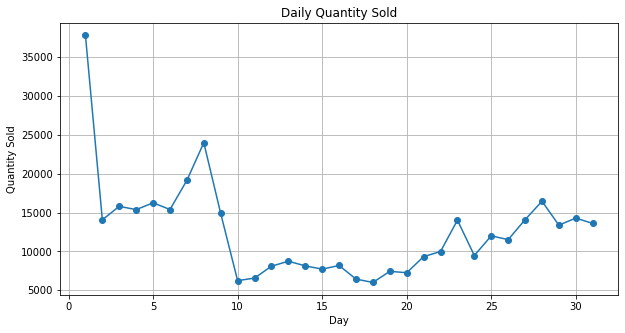

The day with the most quantity sold is 1 with a total quantity of 37803.


In [79]:
daily_quantity = merged_data1.groupby('order_day')['quantity'].sum()
print(daily_quantity)
plt.figure(figsize=(10, 5))
plt.plot(daily_quantity.index, daily_quantity.values, marker='o', linestyle='-')
plt.title('Daily Quantity Sold')
plt.xlabel('Day')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

max_quantity_day = daily_quantity.idxmax()
max_quantity = daily_quantity.max()

print(f"The day with the most quantity sold is {max_quantity_day} with a total quantity of {max_quantity}.")
#First day of the months have most quantity sold.

order_hour
0     13476
1      5903
2      2137
3      1203
4       965
5      1263
6      3616
7      8346
8     15760
9     21426
10    29954
11    24157
12    21584
13    24982
14    24481
15    24457
16    22295
17    17757
18    15471
19    16543
20    21238
21    25172
22    28575
23    20938
Name: quantity, dtype: int64


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Hourly Quantity Sold')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Quantity Sold')

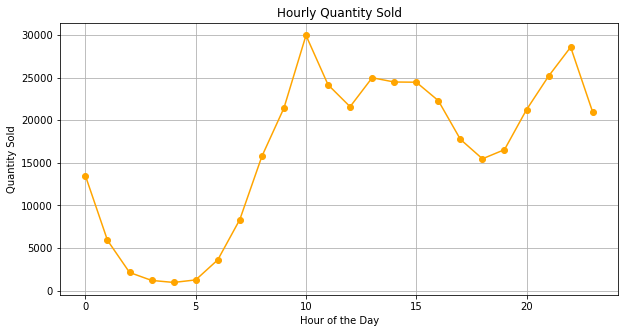

The peak time for orders during a day is at 10 with a total quantity of 29954.


In [80]:
hourly_quantity = merged_data1.groupby('order_hour')['quantity'].sum()
print(hourly_quantity)
# Create a line graph for order trends over the day
plt.figure(figsize=(10, 5))
plt.plot(hourly_quantity.index, hourly_quantity.values, marker='o', linestyle='-', color='orange')
plt.title('Hourly Quantity Sold')
plt.xlabel('Hour of the Day')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

# Find the peak time for orders during a day
peak_hour = hourly_quantity.idxmax()
peak_quantity = hourly_quantity.max()

print(f"The peak time for orders during a day is at {peak_hour} with a total quantity of {peak_quantity}.")
#We can see that the time of orders placed have an increasing trend from 5 A.M and reach maximum at 10 A.M
#Then the trend have a up and down cycle and again reach second highest spot at 10 P.M and reduces slowly again till 4 A.M

<AxesSubplot:>

Text(0.5, 1.0, 'New Users trend')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Counts')

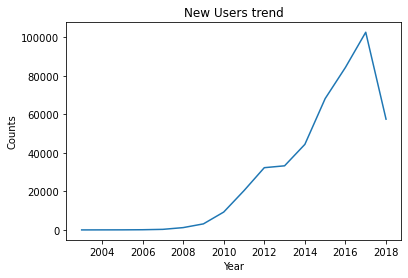

In [81]:
user['year']=user['first_order'].str[:4]
user['year']= pd.to_numeric(user['year'])
user=user.sort_values(by='year')
user['year'].value_counts(sort=False).plot(kind='line')
plt.title('New Users trend')
plt.xlabel('Year')
plt.ylabel('Counts')

New users to JD.com are has an exponential increase trend (2018 has the data for first 3 months. So there is a decline trend.)

# What is the contribution of each channel in terms of sales/profit?

<StringArray>
['app', 'mobile', 'wechat', 'pc', 'others']
Length: 5, dtype: string

<AxesSubplot:xlabel='channel'>

Text(0.5, 0, 'Channel')

Text(0, 0.5, 'Sales revenue')

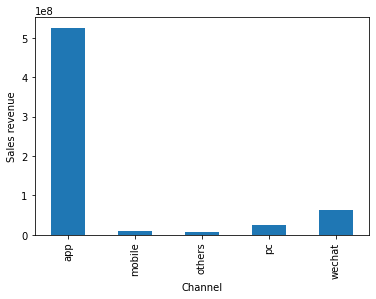

In [82]:
Channel=pd.merge(click,order,on='user_ID')
Channel['channel'].unique()
Sales_channel = Channel.groupby('channel')['final_unit_price'].sum()
Sales_channel.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Sales revenue')
plt.show()

<AxesSubplot:>

Text(0.5, 0, 'Channel')

Text(0, 0.5, 'Number of clicks')

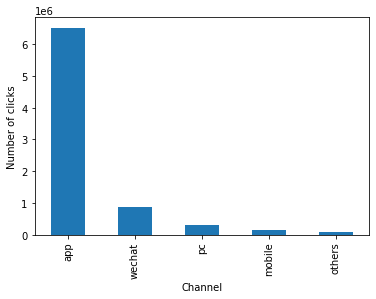

In [83]:
Channel['channel'].value_counts().plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Number of clicks')
plt.show()

The graph illustrates the contribution of different channels in terms of sales and profit for JD.com. The 'app' channel represents JD.com's mobile application, which is experiencing significant user preference and is generating the highest sales and revenue among all channels. Following closely is the 'WeChat' channel, which refers to a mini-program operating within the WeChat social media platform. Channels 'pc' and 'mobile' represent web browsers accessed via computers and mobile devices, respectively.

In [84]:
channel_revenue = Channel.groupby('channel')['final_unit_price'].sum()
channel_discount = Channel.groupby('channel')['direct_discount_per_unit'].sum() + Channel.groupby('channel')['bundle_discount_per_unit'].sum() + Channel.groupby('channel')['coupon_discount_per_unit'].sum()
channel_contribution = channel_revenue - channel_discount
print('Revenue through channel :', channel_revenue)
print('Revenue after all discounts deduction :',channel_contribution)

Revenue through channel : channel
app       5.258489e+08
mobile    9.341649e+06
others    6.728851e+06
pc        2.528808e+07
wechat    6.318699e+07
Name: final_unit_price, dtype: float64
Revenue after all discounts deduction : channel
app       3.628865e+08
mobile    5.863476e+06
others    4.559680e+06
pc        1.835197e+07
wechat    4.321385e+07
dtype: float64


# Analyze sales trend over Year and month wise.

<AxesSubplot:xlabel='order_date'>

Text(0.5, 1.0, 'Sales')

Text(0.5, 0, 'Year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '2018-03-01 00:00:00'),
  Text(1, 0, '2018-03-02 00:00:00'),
  Text(2, 0, '2018-03-03 00:00:00'),
  Text(3, 0, '2018-03-04 00:00:00'),
  Text(4, 0, '2018-03-05 00:00:00'),
  Text(5, 0, '2018-03-06 00:00:00'),
  Text(6, 0, '2018-03-07 00:00:00'),
  Text(7, 0, '2018-03-08 00:00:00'),
  Text(8, 0, '2018-03-09 00:00:00'),
  Text(9, 0, '2018-03-10 00:00:00'),
  Text(10, 0, '2018-03-11 00:00:00'),
  Text(11, 0, '2018-03-12 00:00:00'),
  Text(12, 0, '2018-03-13 00:00:00'),
  Text(13, 0, '2018-03-14 00:00:00'),
  Text(14, 0, '2018-03-15 00:00:00'),
  Text(15, 0, '2018-03-16 00:00:00'),
  Text(16, 0, '2018-03-17 00:00:00'),
  Text(17, 0, '2018-03-18 00:00:00'),
  Text(18, 0, '2018-03-19 00:00:00'),
  Text(19, 0, '2018-03-20 00:00:00'),
  Text(20, 0, '2018-03-21 00:00:00'),
  Text(21, 0, '2018-03-22 00:00:00'),
  Text(22, 0, '2018-03-23 00:00:

Text(0, 0.5, 'No.of sales')

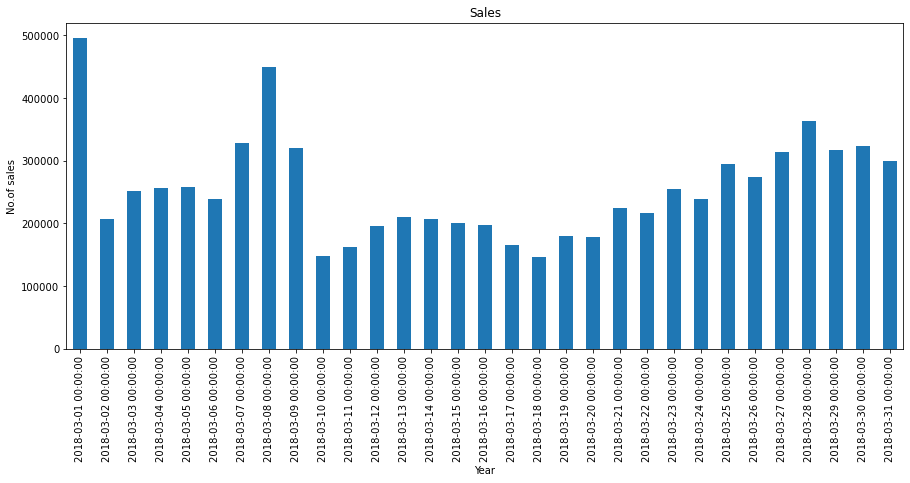

In [85]:

# Year-wise Sales Analysis
Channel['order_date'] = pd.to_datetime(Channel['order_date'])
yearly_sales = Channel.groupby(Channel['order_date'])['order_ID'].count()
yearly_sales.plot(kind='bar', figsize=(15, 6))

plt.title('Sales')
plt.xlabel('Year')
plt.xticks(rotation='vertical')
plt.ylabel('No.of sales')
plt.show()

The sales quantity by date indicates notable spikes on March 1st, 8th, and 28th, with each of these dates recording the highest number of sales within the observed period.

<AxesSubplot:xlabel='order_date'>

Text(0.5, 1.0, 'Sales by Week')

Text(0.5, 0, 'Month')

(array([17591, 17621], dtype=int64), [Text(0, 0, ''), Text(0, 0, '')])

Text(0, 0.5, 'No.of sales')

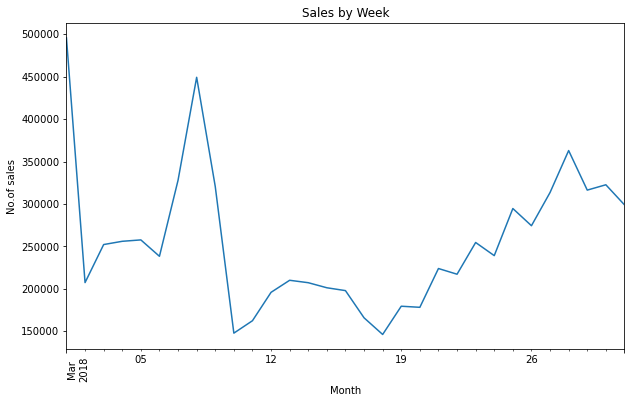

In [86]:
# Month-wise Sales Analysis
monthly_sales = Channel.groupby(Channel['order_date'])['order_ID'].count()
monthly_sales.plot(kind='line',figsize=(10, 6))
plt.title('Sales by Week')
plt.xlabel('Month')
plt.xticks(rotation='vertical')
plt.ylabel('No.of sales')
plt.show()

Analyzing the sales trend over March 2018 reveals a consistent increase from March 19th to the end of the month. However, there is a notable spike on March 8th, followed by a sudden drop thereafter. Further observation highlights a pattern where sales decrease during weekends, suggesting that people tend to prefer outdoor activities over online shopping during those times.

# Top 10 Customers by Amount Purchased in JD.com and the quantity Pruchased

Text(0.5, 0, 'User ID')

Text(0, 0.5, 'Total Amount Purchased (in RMB)')

<AxesSubplot:xlabel='user_ID', ylabel='Total Amount Purchased (in RMB)'>

Text(0, 0.5, 'Number of Items purchased by that Customer')

<AxesSubplot:xlabel='user_ID', ylabel='Number of Items purchased by that Customer'>

Text(0, 1163, '1162')

Text(1, 573, '572')

Text(2, 663, '662')

Text(3, 763, '762')

Text(4, 714, '713')

Text(5, 13, '12')

Text(6, 429, '428')

Text(7, 505, '504')

Text(8, 346, '345')

Text(9, 421, '420')

Text(0.5, 1.0, 'Top Customers by Amount Purchased and number of Items Pruchased')

Text(0.5, 0, 'User ID')

Text(0, 0.5, 'Number of Orders')

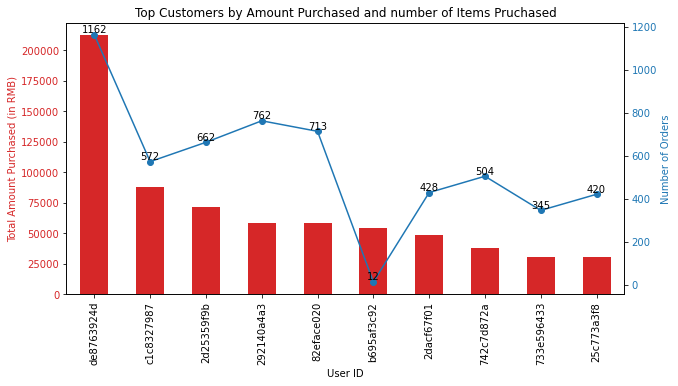

In [87]:
# Get top customers by orders and by total amount purchased
order['amount']=order['quantity']*order['final_unit_price']
top_customers_by_amount = order.groupby('user_ID')['amount'].sum().nlargest(10)

# Get number of items they purchased individually
top_customers_by_orders = order.groupby('user_ID')['quantity'].sum().loc[top_customers_by_amount.index]

# Plotting the dual-axis chart
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting top customers by amount as bars on first y-axis
color = 'tab:red'
ax1.set_xlabel('User ID')
ax1.set_ylabel('Total Amount Purchased (in RMB)', color=color)
top_customers_by_amount.plot(kind='bar', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating the second y-axis and plotting top customers by orders as a line
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Items purchased by that Customer', color=color)
top_customers_by_orders.plot(kind='line', ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Adding annotations to the line plot
for i, v in enumerate(top_customers_by_orders):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom')

# Adding title and labels
plt.title('Top Customers by Amount Purchased and number of Items Pruchased')
ax1.set_xlabel('User ID')
ax2.set_ylabel('Number of Orders')

plt.show()

In [88]:
top_customers_by_amount = order.groupby('user_ID')['amount'].sum().nlargest(10)
top_customers_by_amount
# Get number of items they purchased individually
top_customers_by_orders = order.groupby('user_ID')['quantity'].sum().loc[top_customers_by_amount.index]
top_customers_by_orders

user_ID
de8763924d    212088.24
c1c8327987     87622.22
2d25359f9b     71893.01
292140a4a3     58820.00
82eface020     58519.10
b695af3c92     54614.20
2dacf67f01     48746.92
742c7d872a     37800.00
733e596433     30326.00
25c773a3f8     30170.00
Name: amount, dtype: float64

user_ID
de8763924d    1162
c1c8327987     572
2d25359f9b     662
292140a4a3     762
82eface020     713
b695af3c92      12
2dacf67f01     428
742c7d872a     504
733e596433     345
25c773a3f8     420
Name: quantity, dtype: int64

The above graph represents top 10 customers who have made substantial contribution to JD.com's revenue. For example customer with user_ID 'de8763924d' stands out by purchasing RMB 21,2088.24(0.45% of total revenue generated in March) consisting of 1162 products in the month of March. This customer is not a JD plus member and we can recommend this user as a potential JD plus member to retain the valuable customer.

## Which distribution centre  has more orders?

Text(0.5, 1.0, 'Distribution of Packages Across Different Delivery Centers Origin ')

Text(0.5, 0, 'Distibution Center Origin')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '5.0'),
  Text(1, 0, '9.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '7.0'),
  Text(5, 0, '24.0'),
  Text(6, 0, '10.0'),
  Text(7, 0, '3.0'),
  Text(8, 0, '59.0'),
  Text(9, 0, '58.0')])

Text(0, 0.5, 'count')

Text(0, 5, '105731')

Text(0, 5, '82753')

Text(0, 5, '75298')

Text(0, 5, '55138')

Text(0, 5, '49744')

Text(0, 5, '34236')

Text(0, 5, '23687')

Text(0, 5, '13166')

Text(0, 5, '7573')

Text(0, 5, '5105')

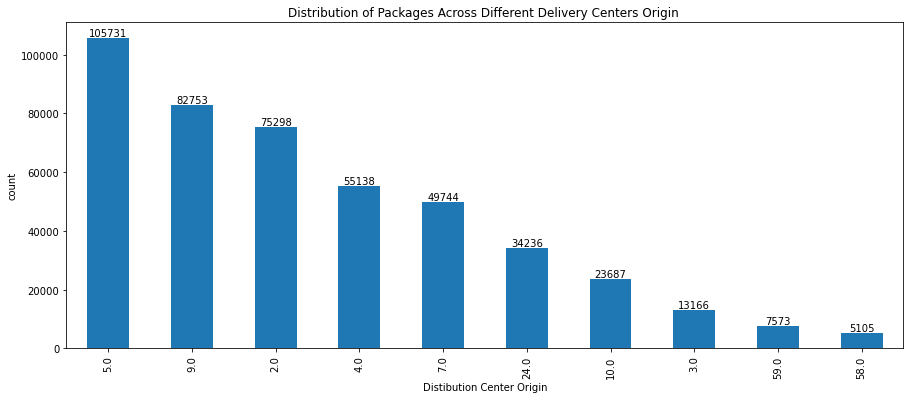

In [89]:
dist_cent=pd.merge(Sku,order,on='sku_ID')
top_distribution_centers = dist_cent.groupby('dc_ori').size().sort_values(ascending=False).head(10)
ax =top_distribution_centers.plot(kind='bar',x='dc_ori', y='count', figsize=(15, 6))
plt.title('Distribution of Packages Across Different Delivery Centers Origin ')
plt.xlabel('Distibution Center Origin')
plt.xticks(rotation='vertical')
plt.ylabel('count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [90]:
packages = merged_data1.groupby(['dc_ori', 'dc_des'])['package_ID'].nunique().reset_index().sort_values(by='package_ID', ascending=False)
print(packages)

     dc_ori  dc_des  package_ID
31      5.0     5.0       31658
6       2.0     2.0       23431
71      9.0     9.0       23061
23      4.0     4.0       20423
120    24.0    24.0       12631
..      ...     ...         ...
326    56.0    18.0           1
379    57.0    19.0           1
322    56.0    14.0           1
4       1.0    46.0           1
287    54.0    13.0           1

[627 rows x 3 columns]


# Top 10 Products customer ordered more frequently and the stock availability in inventory

Text(0.5, 1.0, 'Top 10 Products customer ordered ')

Text(0.5, 0, 'SKU_ID')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '068f4481b3'),
  Text(1, 0, '3c79df1d80'),
  Text(2, 0, 'a9109972d1'),
  Text(3, 0, '623d0a582a'),
  Text(4, 0, '8dc4a01dec'),
  Text(5, 0, 'fbce41fd82'),
  Text(6, 0, '904fbf8b97'),
  Text(7, 0, 'ca7647a231'),
  Text(8, 0, '38d636d2a6'),
  Text(9, 0, '7e4cb4952a')])

Text(0, 0.5, 'No.of times item puchased')

Text(0, 5, '23625')

Text(0, 5, '14463')

Text(0, 5, '10449')

Text(0, 5, '10174')

Text(0, 5, '9891')

Text(0, 5, '8363')

Text(0, 5, '7913')

Text(0, 5, '6456')

Text(0, 5, '6446')

Text(0, 5, '5567')

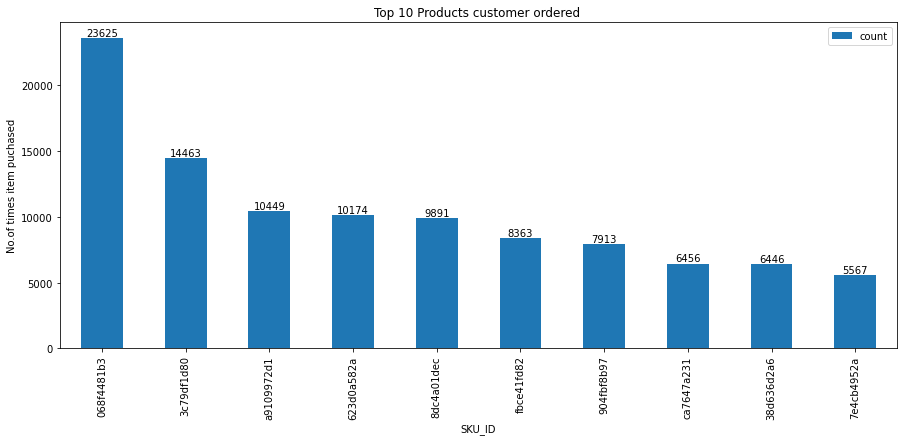

In [91]:
# Group by user_id and product_id, count the occurrences, and sort in descending order
product_counts = order.groupby(['sku_ID']).size().reset_index(name='count')
top_products = product_counts.sort_values(by='count', ascending=False).head(10)

ax =top_products.plot(kind='bar',x='sku_ID', y='count', figsize=(15, 6))
plt.title('Top 10 Products customer ordered ')
plt.xlabel('SKU_ID')
plt.xticks(rotation='vertical')
plt.ylabel('No.of times item puchased')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Top 10 products that are most frequently ordered by the customers

Text(0.5, 1.0, 'Top 10 Products available in inventory')

Text(0.5, 0, 'SKU_ID')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '623d0a582a'),
  Text(1, 0, 'fc5289b139'),
  Text(2, 0, '3c79df1d80'),
  Text(3, 0, 'd47c6ca631'),
  Text(4, 0, '7e4cb4952a'),
  Text(5, 0, '904fbf8b97'),
  Text(6, 0, '8d5f73c188'),
  Text(7, 0, '8dc4a01dec'),
  Text(8, 0, '5eced3cd82'),
  Text(9, 0, 'e237f26793')])

Text(0, 0.5, 'Count of products available in inventory')

Text(0, 5, '1529')

Text(0, 5, '1497')

Text(0, 5, '1417')

Text(0, 5, '1398')

Text(0, 5, '1349')

Text(0, 5, '1344')

Text(0, 5, '1337')

Text(0, 5, '1305')

Text(0, 5, '1302')

Text(0, 5, '1295')

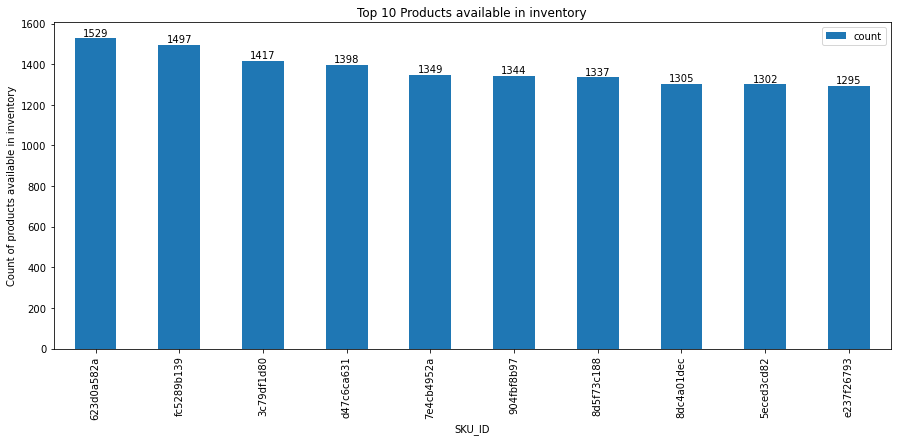

In [92]:
inventory_availability = inventory.groupby(['sku_ID']).size().reset_index(name='count')
top_available_products = inventory_availability.sort_values(by='count', ascending=False).head(10)

ax1 =top_available_products.plot(kind='bar',x='sku_ID', y='count', figsize=(15, 6))
plt.title('Top 10 Products available in inventory')
plt.xlabel('SKU_ID')
plt.xticks(rotation='vertical')
plt.ylabel('Count of products available in inventory')
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Top 10 products availabe in the inventory 

In [93]:
common_records = pd.merge(top_products, top_available_products, on='sku_ID')

print("These products are purchased by customers more and also the top stocked in inventory:")
print(common_records)

These products are purchased by customers more and also the top stocked in inventory:
       sku_ID  count_x  count_y
0  3c79df1d80    14463     1417
1  623d0a582a    10174     1529
2  8dc4a01dec     9891     1305
3  904fbf8b97     7913     1344
4  7e4cb4952a     5567     1349


Text(0.5, 0, 'SKU_ID')

Text(0, 0.5, 'Customer Purchases')

<BarContainer object of 5 artists>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(0.0, 1700.0)

Text(0, 0.5, 'Inventory Stock')

Text(0.5, 1.0, 'Top Customer Purchases vs Inventory Stock')

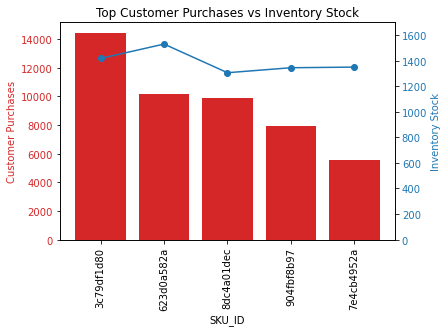

In [94]:
# Plot the dual-axis graph
fig, ax1 = plt.subplots()

# Plot first y-axis
color = 'tab:red'
ax1.set_xlabel('SKU_ID')
ax1.set_ylabel('Customer Purchases', color=color)
ax1.bar(common_records['sku_ID'], common_records['count_x'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation='vertical')

# Create a second y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
plt.ylim(0,1700)
ax2.set_ylabel('Inventory Stock', color=color)
ax2.plot(common_records['sku_ID'], common_records['count_y'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.title('Top Customer Purchases vs Inventory Stock')
plt.show()

Out of top 10 most frequently ordered products 5 products are highly stocked in inventory which shows it is highly available with effective inventory management to meet customer requirements.
The above graph has the top 5 products that are most frequently ordered by the users and also highly available items in the inventory. For example '8dc4a01dec' is ordered 9891 times with considerable remaining of 1305 units post the purchases.

# Predictng the customer purchases

In [95]:
order_user = pd.merge(user, order, on='user_ID', how='left')
order_user['purchased'] = order_user['order_ID'].notnull().astype(int)
order_user.shape
order_user.columns

(543340, 31)

Index(['user_ID', 'user_level', 'first_order', 'plus', 'gender', 'age',
       'marital_status', 'education', 'city_level', 'purchase_power', 'year',
       'index', 'order_ID', 'sku_ID', 'order_date', 'order_time', 'quantity',
       'type', 'promise', 'original_unit_price', 'final_unit_price',
       'direct_discount_per_unit', 'quantity_discount_per_unit',
       'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
       'dc_ori', 'dc_des', 'brand_ID', 'amount', 'purchased'],
      dtype='object')

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Define features and target variable
features = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level','purchase_power']
target = 'purchased'

X = order_user[features]
y = order_user[target]

X.isnull().sum()
y.isnull().sum()

user_level        0
plus              0
gender            0
age               0
marital_status    0
education         0
city_level        0
purchase_power    0
dtype: int64

0

<Figure size 1800x1800 with 0 Axes>

<AxesSubplot:>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'user_level'),
  Text(1.5, 0, 'plus'),
  Text(2.5, 0, 'gender'),
  Text(3.5, 0, 'age'),
  Text(4.5, 0, 'marital_status'),
  Text(5.5, 0, 'education'),
  Text(6.5, 0, 'city_level'),
  Text(7.5, 0, 'purchase_power')])

Text(0.5, 1.0, 'Correlation Matrix')

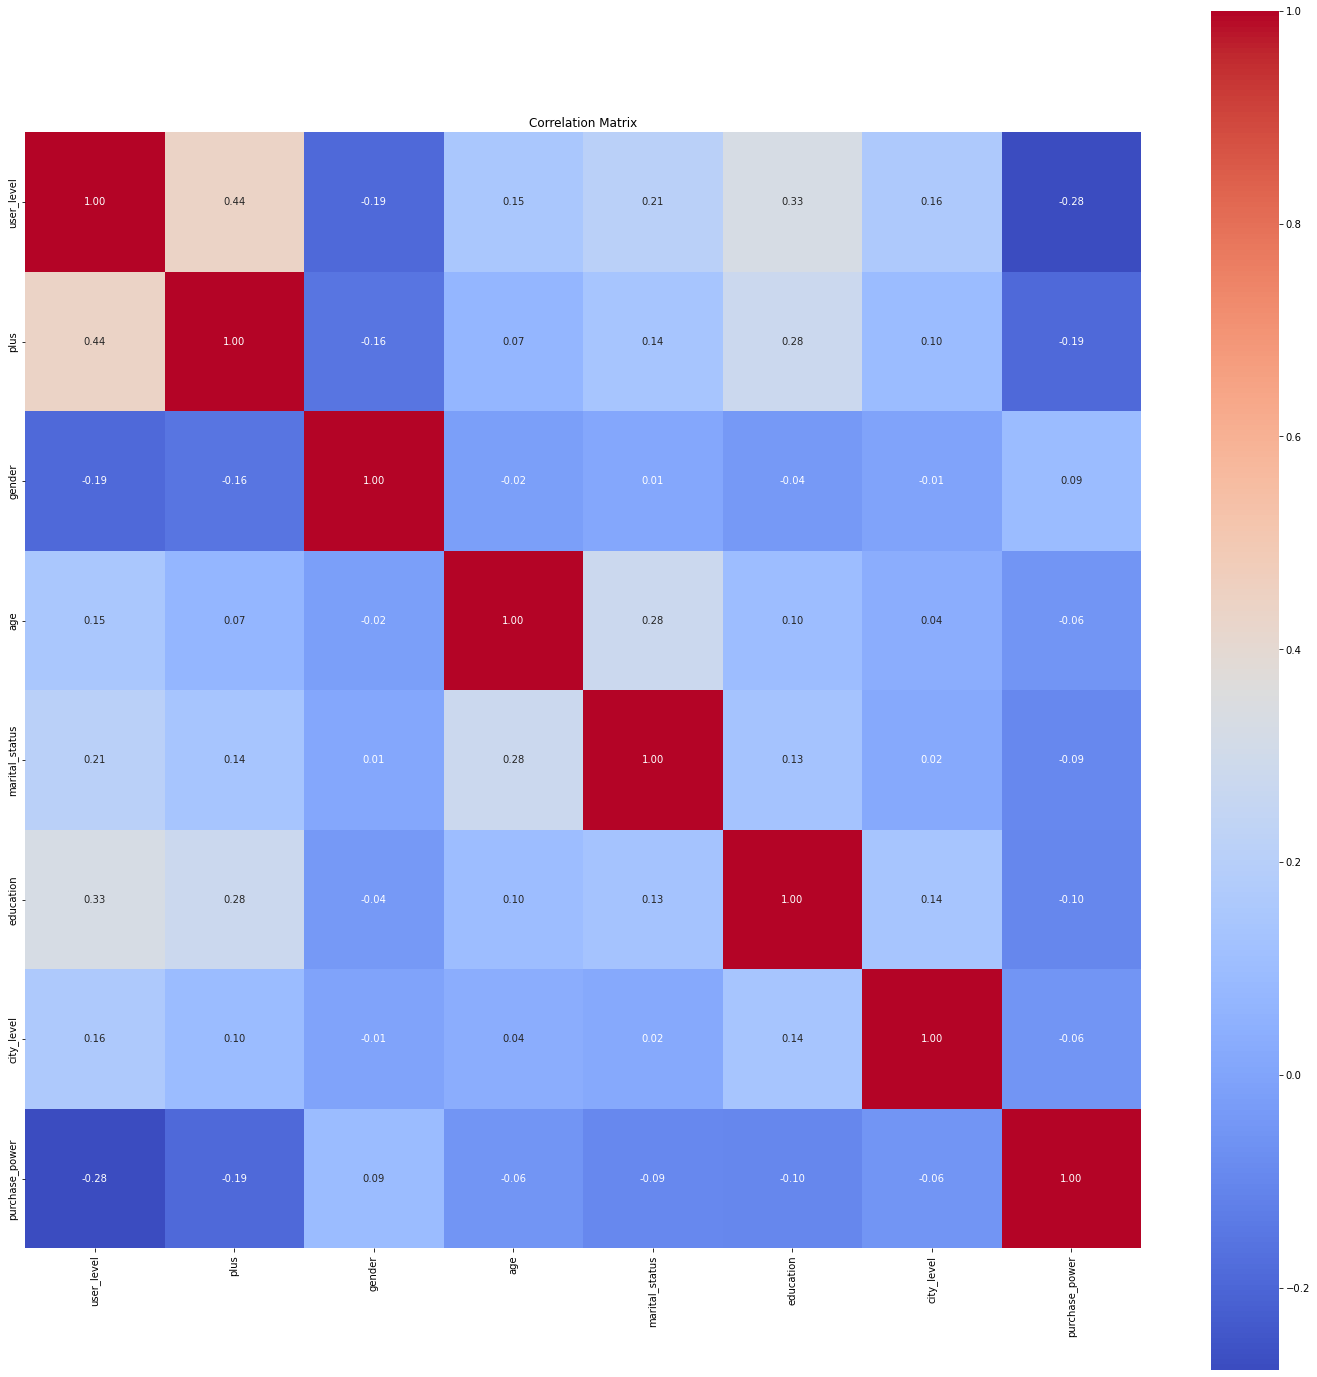

In [97]:
plt.figure(figsize=(25, 25))
# Creating a heatmap using seaborn
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Adding title
plt.title('Correlation Matrix')

# Displaying the plot
plt.show()


# Class Balance: Balancing the data with Over sampling Technique

In [98]:
# Check class distribution
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)

# Implementing oversampling or undersampling (if needed)
from imblearn.over_sampling import RandomOverSampler

# Random over-sampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
over_sampling_class_distribution = y_resampled.value_counts()
print("over-sampling Class Distribution:")
print(over_sampling_class_distribution)


Class Distribution:
1    540018
0      3322
Name: purchased, dtype: int64
over-sampling Class Distribution:
1    540018
0    540018
Name: purchased, dtype: int64


In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.5, random_state=40)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Define a dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting' : GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    # Perform cross-validation on training data
    scores = cross_val_score(model, X_train_scaled, y_train, cv=3)
    
    print("Cross-Validation Scores:", scores)
    print("Mean CV Score:", scores.mean())
    print(f"{name} Accuracy:", accuracy)
    print(f"{name} Classification Report:")
    print(f"{name} ROC AUC:", roc_auc)
    print(classification_report(y_test, predictions))
    print("-" * 50)
    # Feature Importance
    if name == 'Random Forest' or name == 'Gradient Boosting':
        feature_importances = pd.DataFrame(model.feature_importances_,
                                           index=X_train.columns,
                                           columns=['importance']).sort_values('importance', ascending=False)
        print("Feature Importance for", name, ":\n", feature_importances)

    # Dimensionality Reduction using PCA
    if name == 'Logistic Regression' or name == 'Naive Bayes':
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_train_scaled)
        print("PCA Components for", name, ":\n", pca.components_)
        print("Explained Variance Ratio for", name, ":\n", pca.explained_variance_ratio_)

    print()

LogisticRegression()

Cross-Validation Scores: [0.55061498 0.55350933 0.55423708]
Mean CV Score: 0.5527871293179116
Logistic Regression Accuracy: 0.5518816039465351
Logistic Regression Classification Report:
Logistic Regression ROC AUC: 0.5518145205515994
              precision    recall  f1-score   support

           0       0.56      0.47      0.51    269783
           1       0.55      0.63      0.59    270235

    accuracy                           0.55    540018
   macro avg       0.55      0.55      0.55    540018
weighted avg       0.55      0.55      0.55    540018

--------------------------------------------------
PCA Components for Logistic Regression :
 [[ 0.53893967  0.46129145 -0.19492707  0.24238957  0.32085018  0.41562712
   0.17296655 -0.30724061]
 [-0.13753829 -0.23110415  0.45797565  0.60947039  0.5504013   0.02680916
  -0.01149095  0.20660559]]
Explained Variance Ratio for Logistic Regression :
 [0.26867175 0.14540876]



DecisionTreeClassifier()

Cross-Validation Scores: [0.6774552  0.67609413 0.67651634]
Mean CV Score: 0.6766885548259501
Decision Tree Accuracy: 0.677040394949798
Decision Tree Classification Report:
Decision Tree ROC AUC: 0.6771251781431096
              precision    recall  f1-score   support

           0       0.65      0.78      0.71    269783
           1       0.72      0.58      0.64    270235

    accuracy                           0.68    540018
   macro avg       0.68      0.68      0.67    540018
weighted avg       0.68      0.68      0.67    540018

--------------------------------------------------



GaussianNB()

Cross-Validation Scores: [0.56202571 0.56513116 0.56497006]
Mean CV Score: 0.5640423097007877
Naive Bayes Accuracy: 0.5641756385898248
Naive Bayes Classification Report:
Naive Bayes ROC AUC: 0.5641352867775749
              precision    recall  f1-score   support

           0       0.57      0.52      0.54    269783
           1       0.56      0.61      0.58    270235

    accuracy                           0.56    540018
   macro avg       0.56      0.56      0.56    540018
weighted avg       0.56      0.56      0.56    540018

--------------------------------------------------
PCA Components for Naive Bayes :
 [[ 0.53893967  0.46129145 -0.19492707  0.24238957  0.32085018  0.41562712
   0.17296655 -0.30724061]
 [-0.13753829 -0.23110415  0.45797565  0.60947039  0.5504013   0.02680916
  -0.01149095  0.20660559]]
Explained Variance Ratio for Naive Bayes :
 [0.26867175 0.14540876]



RandomForestClassifier()

Cross-Validation Scores: [0.67800518 0.67635523 0.67677744]
Mean CV Score: 0.6770459503201746
Random Forest Accuracy: 0.6771496505672033
Random Forest Classification Report:
Random Forest ROC AUC: 0.6772342679906593
              precision    recall  f1-score   support

           0       0.65      0.78      0.71    269783
           1       0.72      0.58      0.64    270235

    accuracy                           0.68    540018
   macro avg       0.68      0.68      0.67    540018
weighted avg       0.68      0.68      0.67    540018

--------------------------------------------------
Feature Importance for Random Forest :
                 importance
user_level        0.218516
city_level        0.207477
age               0.177080
purchase_power    0.134961
education         0.120793
gender            0.051886
marital_status    0.045985
plus              0.043301



GradientBoostingClassifier()

Cross-Validation Scores: [0.5877693  0.58938035 0.58705821]
Mean CV Score: 0.5880692865793362
Gradient Boosting Accuracy: 0.5879322541100482
Gradient Boosting Classification Report:
Gradient Boosting ROC AUC: 0.5879911772357849
              precision    recall  f1-score   support

           0       0.58      0.66      0.61    269783
           1       0.60      0.52      0.56    270235

    accuracy                           0.59    540018
   macro avg       0.59      0.59      0.59    540018
weighted avg       0.59      0.59      0.59    540018

--------------------------------------------------
Feature Importance for Gradient Boosting :
                 importance
user_level        0.258139
plus              0.186981
age               0.184094
education         0.181892
purchase_power    0.069031
city_level        0.059634
marital_status    0.049526
gender            0.010704



# Recommendation system

# Model-1: Similarity-Based Collaborative Filtering (KNN model) 
# Based on the input user_ID recommends the products that given user has never purchased

In [309]:
order_sku = pd.merge(order,Sku, on ="sku_ID", how = "inner")
order_sku = pd.DataFrame(order_sku[['user_ID','sku_ID','rating']])

# Group by 'user_ID' and 'sku_ID', then calculate the average of 'rating'
order_sku = order_sku.groupby(['user_ID', 'sku_ID'])['rating'].mean().reset_index()
order_sku = order_sku[order_sku['rating']!=0] 

In [313]:
# Applying constraint on user id using it's count 
x = order_sku.groupby('user_ID').count()['rating'] > 10
filtered_df = order_sku[order_sku['user_ID'].isin(x[x].index)]

# Applying constraint on number of rartings
y = order_sku.groupby('sku_ID').count()['rating'] > 10
filtered_df = filtered_df[filtered_df['sku_ID'].isin(y[y].index)]
filtered_df.shape 

(760, 3)

In [320]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(data, user_ID, top_n):
    # Creating a user-item interactions matrix
    user_item_interactions_matrix = filtered_df.pivot(index='user_ID', columns='sku_ID', values='rating').fillna(0)

    # Calculate the cosine similarity matrix for the item-item interactions
    item_similarity_scores = cosine_similarity(user_item_interactions_matrix.T)

    # Get the user's ratings
    user_ratings = user_item_interactions_matrix.loc[user_ID]

    # Extracting sku_ids which the user has not purchased yet
    non_purchased_products = user_item_interactions_matrix.columns[user_item_interactions_matrix.loc[user_ID] == 0].tolist()

    product_recommendations = []

    # Iterating over each sku ID which the user has not interacted with yet
    for sku_ID in non_purchased_products:
        sku_index = user_item_interactions_matrix.columns.get_loc(sku_ID)

        # Compute a score for each non-purchased product, based on item similarity and user's existing ratings
        score = sum(item_similarity_scores[sku_index] * user_ratings)/100


        # Appending the product ID, the computed score, and the estimated rating
        product_recommendations.append((sku_ID, score))

    # Sorting the recommended products by the computed score and estimated rating in descending order
    product_recommendations.sort(key=lambda x: x[1], reverse=True)

    return product_recommendations[:top_n]


In [323]:
user_item_interactions_matrix = filtered_df.pivot(index='user_ID', columns='sku_ID', values='rating').fillna(0)
user_item_interactions_matrix

sku_ID,00804aa873,019dedb453,01c9d91829,027604c03a,067b673f2b,068f4481b3,093f8b489e,0aa7e6b035,0b16a50488,0b2fd9f253,...,f16794cf8a,f255daf3ab,f3bb37b4ff,f52ec33325,f5b527bb09,fa0a1859ef,fb209ec29d,fbce41fd82,fc728c8ac1,fffe1bd280
user_ID,,,,,,,,,,,,,,,,,,,,,
14b5430f94,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1935d21e59,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1a75247e23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1e4bfd96e5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2be693ef24,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2c43943968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2dacf67f01,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
3b029ac012,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3b27615997,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0


In [321]:
#Top 5 recommendations for specific user_id with a similarity-based recommendation engine
KNN_recommendations = get_recommendations(order_sku,'14b5430f94',5)
KNN_recommendations

[('7e4cb4952a', 0.3322997482448192),
 ('a1b0f57464', 0.32706940214389846),
 ('1b3f5d4d21', 0.31804734871195284),
 ('7f947c0055', 0.31616281484650305),
 ('38d636d2a6', 0.3008974727319783)]

# Model 2: Similarity-Based Collaborative Filtering
# Recommend products based on the similar products

In [269]:
def unique_values(dataset):
  """
  function : unique_values
  description : this takes a dataset and return unique values of each and every column/feature.
  return type : dataframe
  """

  list_unique_valeus = [dataset[col].nunique() for col in dataset.columns]
  list_cols = dataset.columns.tolist()
  data = list(zip(list_cols,list_unique_valeus))
  df = pd.DataFrame(data,columns = ['Column','No of Unique Values'])
  return df
unique_values(order_sku)

,Column,No of Unique Values
0,user_ID,437247
1,sku_ID,8832
2,rating,6


In [270]:
x = order_sku.groupby('user_ID').count()['rating'] > 5
order_sku['user_ID'].isin(x[x].index)

order_sku = order_sku[order_sku['rating']!=0] 
order_sku.shape

0         False
1         False
2         False
3         False
4         False
          ...  
508903    False
508904    False
508905    False
508906    False
508907    False
Name: user_ID, Length: 508908, dtype: bool

(505623, 3)

In [271]:
# Applying constraint on user id using it's count 
x = order_sku.groupby('user_ID').count()['rating'] > 15
filtered_df = order_sku[order_sku['user_ID'].isin(x[x].index)]

# Applying constraint on number of rartings
y = order_sku.groupby('sku_ID').count()['rating'] > 15
filtered_df = filtered_df[filtered_df['sku_ID'].isin(y[y].index)]
filtered_df.shape 
print(filtered_df.head())

# From a user item matrix with values as ratings

pt = filtered_df.pivot_table(index='sku_ID',columns='user_ID',values='rating').fillna(0) # filling nan with 0
pt

(538, 3)

          user_ID      sku_ID  rating
40865  14b5430f94  00804aa873     4.0
40866  14b5430f94  01c9d91829     3.0
40867  14b5430f94  0b2fd9f253     1.0
40868  14b5430f94  26e590cf39     4.0
40869  14b5430f94  2e06817802     5.0


user_ID,14b5430f94,1a75247e23,2c43943968,3b029ac012,3b27615997,42e3f9c6f1,436ce8a5eb,5ae805abb3,67932b299d,6f6e75e6d4,8e5c946639,a309b4f150,aa6f8d33c2,b8e50e32fb,ba740db18f,bd2cea0899,c75a7e2c67,dfa22a6eb8,e2448ab099,ed292ef15b
sku_ID,,,,,,,,,,,,,,,,,,,,
00804aa873,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01c9d91829,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
027604c03a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
067b673f2b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,5.0,0.0,5.0,5.0
068f4481b3,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fa0a1859ef,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
fb209ec29d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
fbce41fd82,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0,0.0,5.0,0.0


In [272]:
# Create an object of cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

for i,j in enumerate([1,2,3]):
  print(f"Index : {i} value {j}")

(177, 177)

Index : 0 value 1
Index : 1 value 2
Index : 2 value 3


In [273]:

def recommend_product(sku_ID):
  """
  Description: It takes a product ID and return data frame with similarity score 
  Function: recommend_product
  Return type : dataframe
  """
  index = np.where(pt.index == sku_ID)[0][0] 
  similar_products = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1], reverse = True)[1:6] 
  # creating the list tuple of index with respect to similarity score
  
  # print(similar_products)
  
  print("\n----------------Recommended products-----------------\n")
  for i in similar_products:
    print(pt.index[i[0]]) 
  print("\n.....................................................\n")  
  return find_similarity_score(similar_products,pt)  
     

In [275]:
def find_similarity_score(similarity_scores,pivot_table):

  """
  Description: It takes similarity_Score and pivot table and return dataframe.
  function : find_similarity_Score
  Output : dataframe
  Argument  similarity_score and pivot table
  """
  list_product = []
  list_sim = []
  for i in similarity_scores:
    index_ = i[0]
    sim_ = i[1]
    list_sim.append(sim_)
    # list_book.append(pivot_table[pivot_table.index == index_]['Prodcut-ID'][index_])
    list_product.append(pivot_table.iloc[index_,:].name)
    
    df = pd.DataFrame(list(zip(list_product, list_sim)),
               columns =['Product', 'Similarity'])
  # df =pd.DataFrame([list_product, list_sim], columns = ["Product",'Similarity_Score'])
  return df

In [276]:
recommend_product('01c9d91829')


----------------Recommended products-----------------

427bea8ec7
2e06817802
f06e13a877
3c79df1d80
0b2fd9f253

.....................................................



,Product,Similarity
0,427bea8ec7,0.774597
1,2e06817802,0.676123
2,f06e13a877,0.670820
3,3c79df1d80,0.645497
4,0b2fd9f253,0.632456
